# Convolution Neural Networks (CNNs)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import warnings


warnings.filterwarnings("ignore")
%matplotlib inline

## Black/White image in CNNs

A black-and-white (grayscale) image in a CNN is represented as a 2D array, where each number corresponds to the brightness (intensity) of a pixel.

+ **0** - completely black pixel
+ **255** - completely white pixel
+ $p_{ij} \in [0, 255]$ - various shades of gray, where lower values are darker and higher values are lighter.
+ The size of the tensor `(height, width, 1)` - 1 channel, brightness (from 0 to 255)

In [2]:
# random b/w image
grayscale_image = np.random.randint(0, 255, (4, 4))

In [3]:
# 2D tensor
print(grayscale_image)

[[ 27 155  85 215]
 [181  36 102 195]
 [ 42   4 144  38]
 [  2 170 119 132]]


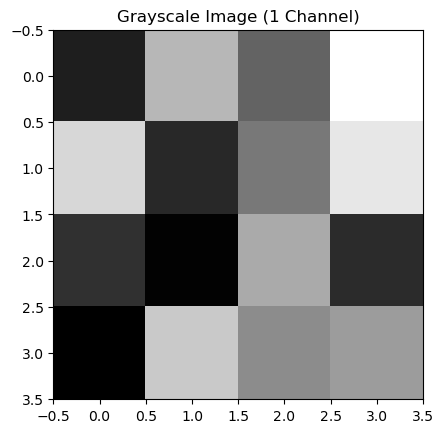

In [4]:
# show B/W image
plt.imshow(grayscale_image, cmap="gray")
plt.title("Grayscale Image (1 Channel)")
plt.show()

## RGB image in CNNs

RGB (Red, Green, Blue) refers to the three-channel representation of a color image. Unlike grayscale images, where each pixel has only one intensity value, RGB images store three values per pixel, corresponding to red, green, and blue color intensities.

A **tensor** in CNN represents an **RGB image** as a **3D array**, where:

- **Indexes `(i, j)` represent the coordinates of a pixel** in the image.
- **Each pixel is represented by a tuple `(R, G, B)`, where:**
  - \( R \) (Red) → Intensity of the red channel.
  - \( G \) (Green) → Intensity of the green channel.
  - \( B \) (Blue) → Intensity of the blue channel.

This means that an **RGB image** is stored as a **3D tensor** with dimensions:

\[
(H, W, 3)
\]

- **\( H \)** → Image height (number of rows)
- **\( W \)** → Image width (number of columns)
- **\( 3 \)** → The three RGB color channels

Each pixel in the image has **three brightness values** corresponding to the **three color channels**.


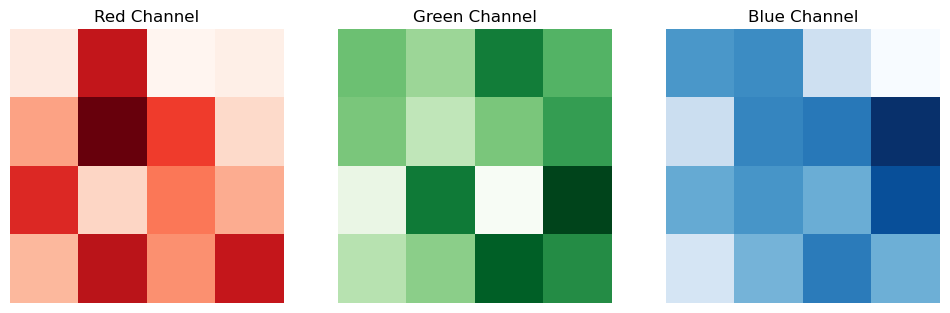

In [5]:
# random RGB image
color_image = np.random.randint(0, 255, (4, 4, 3), dtype=np.uint8)

# extract each channel
red_channel = color_image[:, :, 0]    # index of R channel = 0
green_channel = color_image[:, :, 1]  # index of G channel = 1
blue_channel = color_image[:, :, 2]   # index of B channel = 2

# plot each channel separately
fig, ax = plt.subplots(1, 3, figsize=(12, 4))

# red channel
ax[0].imshow(red_channel, cmap="Reds")  
ax[0].set_title("Red Channel")
ax[0].axis("off")

# green channel
ax[1].imshow(green_channel, cmap="Greens")  
ax[1].set_title("Green Channel")
ax[1].axis("off")

# blue channel
ax[2].imshow(blue_channel, cmap="Blues")  
ax[2].set_title("Blue Channel")
ax[2].axis("off")

plt.show()

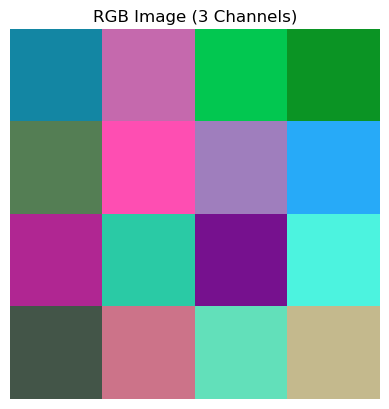

In [6]:
# plot RGB image
plt.imshow(color_image)
plt.title("RGB Image (3 Channels)")
plt.axis("off")
plt.show()

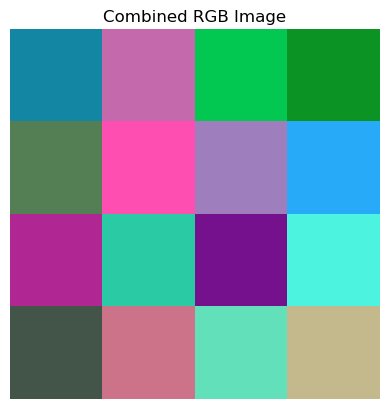

In [7]:
# combine 3 channels into one RGB
rgb_image = np.stack([red_channel, green_channel, blue_channel], axis=2)
plt.imshow(rgb_image)
plt.title("Combined RGB Image")
plt.axis("off")
plt.show()

In [8]:
red_channel

array([[ 19, 197,   2,  11],
       [ 84, 254, 159,  39],
       [176,  42, 118,  76],
       [ 67, 204,  98, 196]], dtype=uint8)

In [9]:
green_channel

array([[134, 105, 199, 148],
       [126,  78, 126, 170],
       [ 38, 202,  17, 243],
       [ 85, 115, 224, 185]], dtype=uint8)

In [10]:
blue_channel

array([[163, 173,  80,  36],
       [ 84, 178, 189, 248],
       [146, 165, 142, 223],
       [ 72, 137, 186, 141]], dtype=uint8)

In [11]:
print(rgb_image)

[[[ 19 134 163]
  [197 105 173]
  [  2 199  80]
  [ 11 148  36]]

 [[ 84 126  84]
  [254  78 178]
  [159 126 189]
  [ 39 170 248]]

 [[176  38 146]
  [ 42 202 165]
  [118  17 142]
  [ 76 243 223]]

 [[ 67  85  72]
  [204 115 137]
  [ 98 224 186]
  [196 185 141]]]


## Step-by-step

+ **Step 1.** Convolution Layer
+ **Step 2.** ReLU Layer
+ **Step 3.** Max Pooling Layer
+ **Step 4.** Flattering Layer
+ **Step 5.** Fully Connected Layer
+ **Step 6.** Output Layer

### Step 1. Convolution Layer

Convolution in CNN is an operation where a feature detector (filter) slides over an image and computes a **new feature map**.  

$$
S(i, j) = \sum_{m=0}^{k-1} \sum_{n=0}^{k-1} I(i+m, j+n) \cdot K(m, n)
$$

where:

+ $S(i, j)$ — value of the pixel in the output feature map.
+ $I(i+m, j+n)$ — input image.
+ $K(m, n)$ — feature detector of size $k \times k$.
+ $k$ — size of the feature detector (typically 3x3 or 5x5).
+ $i, j$ — pixel coordinates in the output feature map.
+ $m, n$ — coordinates inside the filter window.
    
Purpose of the convolution:
- Takes a fragment of the image of size $k \times k$.
- Performs element-wise multiplication of the fragment with the feature detector.
- Sums up all the resulting values.
- Writes the result into a new image.

**Size of feature map**

$$
\text{Output Size} = \frac{\text{(Input Size - Filter Size)}}{\text{Stride}} + 1
$$

where:
- $\text{Input Size}$ — size of the input image.
- $\text{Filter Size}$ — size of the filter.
- $\text{Stride}$ — how many pixels the filter shifts.

### Filters

#### Sharpen

$$
\begin{bmatrix}
0 & 0 & 0 & 0 & 0\\
0 & 0 & -1 & 0 & 0\\
0 & -1 & 5 & -1 & 0\\
0 & 0 & -1 & 0 & 0\\
0 & 0 & 0 & 0 & 0
\end{bmatrix}
$$

#### Blur

$$
\begin{bmatrix}
0 & 0 & 0 & 0 & 0\\
0 & 1 & 1 & 1 & 0\\
0 & 1 & 1 & 1 & 0\\
0 & 1 & 1 & 1 & 0\\
0 & 0 & 0 & 0 & 0
\end{bmatrix}
$$

#### Edge Enhance

$$
\begin{bmatrix}
0 & 0 & 0 \\
-1 & 1 & 0 \\
0 & 0 & 0 \\
\end{bmatrix}
$$

#### Edge Detect

$$
\begin{bmatrix}
0 & 1 & 0 \\
1 & -4 & 1 \\
0 & 1 & 0 \\
\end{bmatrix}
$$

#### Emboss

$$
\begin{bmatrix}
-2 & -1 & 0 \\
-1 & 1 & 1 \\
0 & 1 & 2 \\
\end{bmatrix}
$$

### Step 2. ReUL Layer

#### Activation Functions

In [12]:
import numpy as np
import matplotlib.pyplot as plt

def plot_activation_function(name, func):
    plt.figure(figsize=(6, 4))
    x = np.linspace(-10, 10, 600)
    y = func(x)
    plt.scatter(x, y, label=name, color="blue", s=5)
    plt.axhline(0, color="black", linestyle="--", linewidth=0.5)
    plt.axvline(0, color="black", linestyle="--", linewidth=0.5)
    plt.title(f"{name} Activation Function")
    plt.xlabel("Input (x)")
    plt.ylabel("Output")
    plt.grid(True, linestyle="--", alpha=0.7)
    plt.legend()
    plt.show()

#### ReLU activation function

$$
f(x) = max(0, x)
$$

+ If $x < 0$, them $f(x) = 0$
+ If $x \ge 0$, them $f(x) = x$

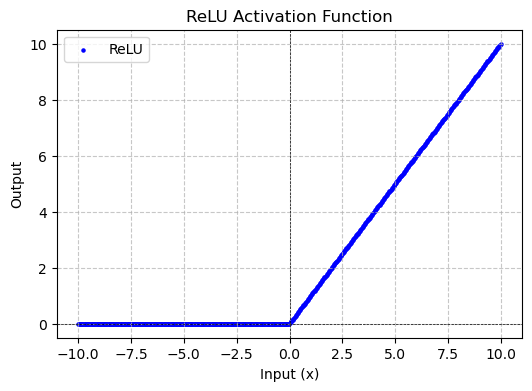

In [13]:
plot_activation_function("ReLU", lambda x: np.maximum(0, x))

#### Leaky ReLU activation function

$$
f(x) = 
\begin{equation*}
  \left\{
    \begin{aligned}
      & \alpha x, \space \text{if} \space x < 0  \\
      & x, \space \text{if} \space x \ge 0
    \end{aligned}
  \right.
\end{equation*}
$$

+ Usually $\alpha = 0.01$

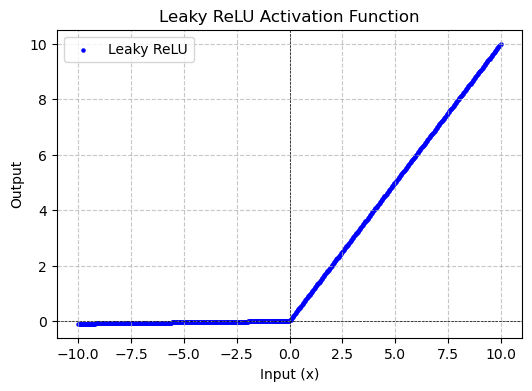

In [14]:
plot_activation_function("Leaky ReLU", lambda x: np.where(x > 0, x, x * 0.01))

### Step 3. Max Pooling

Max Pooling is a technique used in CNN to reduce the size of an image while keeping the most important information.

+ A small window (e.g., 2×2 or 3×3) moves over the image.
+ From each window, only the largest (maximum) value is kept.
+ This process shrinks the image, making it easier and faster to process while preserving key details.

### Step 4. Flattening Layer

Flattening is a step in CNNs that converts the multi-dimensional feature maps (output from convolutional and pooling layers) into a 1D vector to be used in the fully connected layer.

### Step 5. Fully Connected Layer

A Fully Connected Layer in a CNNs is a layer where every neuron is connected to every neuron in the previous and next layer. It is used to interpret extracted features and make final predictions.

+ Takes input from the Flattened Layer (a 1D vector of extracted features).
+ Each neuron is connected to all previous neurons, meaning it learns complex relationships between features.
+ Uses activation functions (e.g., ReLU, Softmax) to transform data and make predictions.

### Step 6. Output Layer

The Output Layer is the final layer in a CNN, responsible for making predictions based on the features extracted by previous layers.

#### Sigmoid activation function (2 classes)

$$
f(x) = \frac {1} {1 + e^{-x}}
$$

+ $f(x) \in [0, 1]$

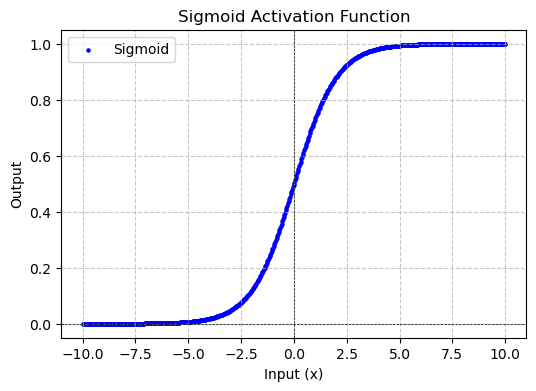

In [15]:
plot_activation_function("Sigmoid", lambda x: 1 / (1 + np.exp(-x)))

#### Softmax activation function (more than 2 classes)

$$
f(x_i) = \frac {e^{x_i}} {\sum_{j=1}^n e^{x_j}}
$$

+ $e^{x_i}$ is the exponential of the input value.
+ The denominator normalizes the values so that their sum equals 1.

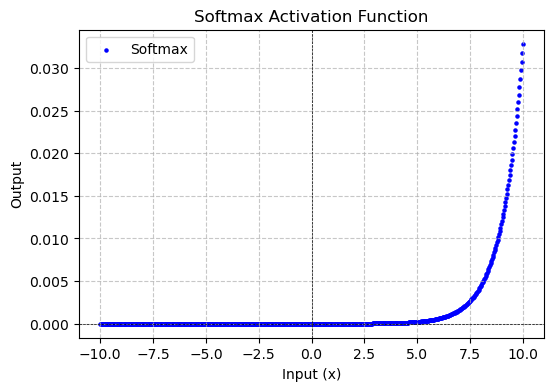

In [16]:
plot_activation_function("Softmax", lambda x: np.exp(x) / np.sum(np.exp(x)))

#### Cross-Entropy function

**Binary classification:**
$$
L = - \left( y \log(\hat{y}) + (1 - y) \log(1 - \hat{y}) \right)
$$

Where:  
- $y$ = true label (0 or 1).  
- $\hat{y}$ = predicted probability of class 1 (range: 0 to 1).  
- $log$ = natural logarithm.

**Multi-class classification:**

$$
L = - \sum_{i=1}^{N} y_i \log(\hat{y_i})
$$

Where:  
- $N$ = number of classes.  
- $y_i$ = true label (1 for the correct class, 0 otherwise).  
- $\hat{y_i}$ = predicted probability for class $i$ (output from Softmax).  


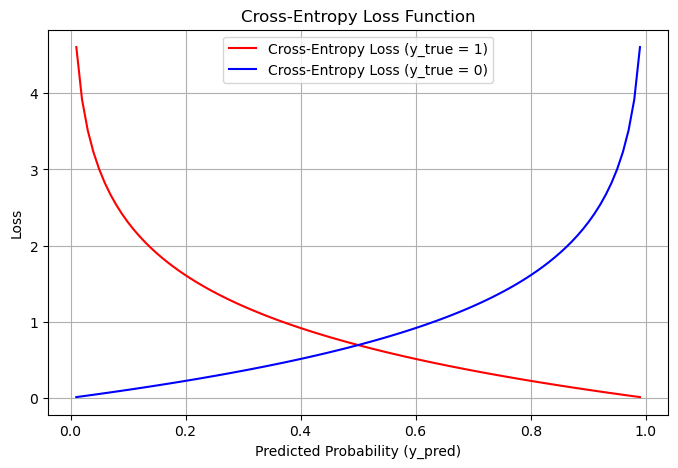

In [17]:
# Cross-entropy loss function for binary classification
def cross_entropy_loss(y_true, y_pred):
    return - (y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

# Generate values for prediction probabilities (y_pred)
y_pred = np.linspace(0.01, 0.99, 100)  # Avoiding exact 0 and 1 to prevent log(0) issues

# Compute loss for y_true = 1 and y_true = 0
loss_y1 = cross_entropy_loss(1, y_pred)
loss_y0 = cross_entropy_loss(0, y_pred)

# Plot Cross-Entropy Loss
plt.figure(figsize=(8, 5))
plt.plot(y_pred, loss_y1, label="Cross-Entropy Loss (y_true = 1)", color="red")
plt.plot(y_pred, loss_y0, label="Cross-Entropy Loss (y_true = 0)", color="blue")
plt.xlabel("Predicted Probability (y_pred)")
plt.ylabel("Loss")
plt.title("Cross-Entropy Loss Function")
plt.legend()
plt.grid()
plt.show()


## Dataset

The full dataset is available [here](https://drive.google.com/file/d/1v2hL8Vz0w0d12HmHWoOL3m2bp75W1R6M/view?usp=sharing).

In [18]:
%ls ../00_data/dataset/

test_set/     training_set/


## `tensorflow` library

In [19]:
import tensorflow as tf

tf.__version__

2025-02-15 19:53:16.671846: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


'2.17.0'

## Data Preprocessing

### Image Transformations
Apply:

+ **Shearing transformation**\
  Skews the image along the X or Y axis, making objects appear slanted. Helps models learn from perspective distortions.
+ **Zoom transformation**\
  Enlarges (zoom in) or shrinks (zoom out) an image while keeping its dimensions. Improves robustness by simulating different distances.
+ **Horizontal flip transformation**\
  Mirrors the image along the vertical axis (left-to-right). Useful for tasks where object orientation doesn’t matter.

Zoom


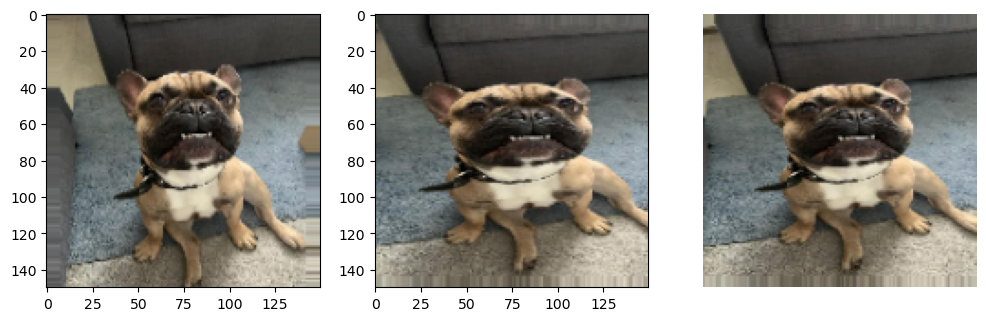

Horizontal Flip


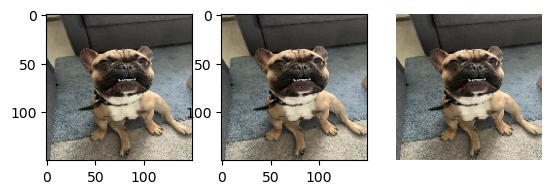

Searing


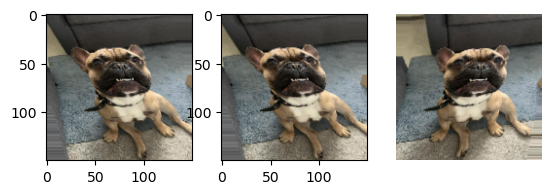

In [20]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image

generators = {
    'Zoom': ImageDataGenerator(zoom_range=[0.8, 1.2]), # zoom changing within 80% and 120% range
    'Horizontal Flip': ImageDataGenerator(horizontal_flip=True), 
    'Searing': ImageDataGenerator(shear_range=20) # shearing within 0 and 20 degrees
}

img_path = "./pic/pic.png"
img = image.load_img(img_path, target_size=(150, 150))  # change target image size
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0) # add batch dimention

plt.figure(figsize=(12, 10))
for transformation, transformer in generators.items():
    for i in range(3):
        plt.subplot(1, 3, i + 1)
        batch = next(transformer.flow(x, batch_size=1))
        plt.imshow(batch[0].astype("uint8"))
    print(transformation)
    plt.axis("off")
    plt.show()


### Training Set

In [21]:
train_datagen = ImageDataGenerator(rescale=1./255,  # normalization
                                   shear_range=0.2, # 20
                                   zoom_range=0.2,  # (0.8, 1.2)
                                   horizontal_flip=True)

training_set = train_datagen.flow_from_directory("../00_data/dataset/training_set",
                                                 target_size=(64, 64),
                                                batch_size=32,
                                                class_mode="binary")

Found 8000 images belonging to 2 classes.


### Test Set

In [22]:
test_datagen = ImageDataGenerator(rescale=1./255) # normalization like in train

test_set = test_datagen.flow_from_directory("../00_data/dataset/test_set",
                                                 target_size=(64, 64),
                                                 batch_size=32,
                                                 class_mode="binary")

Found 2001 images belonging to 2 classes.


## Building the CNN

In [23]:
# init CNN
cnn = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=[64, 64, 3]), 
    tf.keras.layers.Conv2D(filters=32, kernel_size=3), # Step 1. Convolution
    tf.keras.layers.LeakyReLU(negative_slope=0.2), # Step 2. ReLU/Leaky ReLU
    tf.keras.layers.MaxPooling2D(pool_size=4, strides=2), # Step 3. Max Pooling
    tf.keras.layers.Conv2D(filters=64, kernel_size=3), # second convolition
    tf.keras.layers.LeakyReLU(negative_slope=0.2),
    tf.keras.layers.MaxPooling2D(pool_size=4, strides=2),
    tf.keras.layers.Conv2D(filters=128, kernel_size=3), # third convolition
    tf.keras.layers.LeakyReLU(negative_slope=0.2),
    tf.keras.layers.MaxPooling2D(pool_size=4, strides=2),
    tf.keras.layers.Flatten(), # Step 4. Flattering
    tf.keras.layers.Dense(256, activation='relu'), # Step 5.
    tf.keras.layers.Dense(1, activation='sigmoid') # Step 6. Output layer
])

In [24]:
# compiling the CNN
cnn.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [25]:
cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 30, 30, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 28, 28, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 28, 28, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 11, 11, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_2 (LeakyReLU)       │ (None, 11, 11, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       524,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 618,049 (2.36 MB)

 Trainable params: 618,049 (2.36 MB)

 Non-trainable params: 0 (0.00 B)

In [26]:
# training the CNN
history = cnn.fit(x = training_set, validation_data=test_set, epochs=25)

Epoch 1/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 40s 153ms/step - accuracy: 0.5588 - loss: 0.6846 - val_accuracy: 0.6482 - val_loss: 0.6374
Epoch 2/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 38s 150ms/step - accuracy: 0.6729 - loss: 0.5964 - val_accuracy: 0.7101 - val_loss: 0.5710
Epoch 3/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 37s 149ms/step - accuracy: 0.7332 - loss: 0.5257 - val_accuracy: 0.7421 - val_loss: 0.5272
Epoch 4/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 38s 151ms/step - accuracy: 0.7745 - loss: 0.4826 - val_accuracy: 0.7816 - val_loss: 0.4627
Epoch 5/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 37s 149ms/step - accuracy: 0.7934 - loss: 0.4422 - val_accuracy: 0.7436 - val_loss: 0.6049
Epoch 6/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 41s 164ms/step - accuracy: 0.8067 - loss: 0.4199 - val_accuracy: 0.7981 - val_loss: 0.4473
Epoch 7/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 45s 178ms/step - accuracy: 0.8158 - loss: 0.3994 - val_accuracy: 0.8151 - val_loss: 0.4087
Epoch 8/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 45s 181ms/step - accuracy: 0.8375 - loss: 0

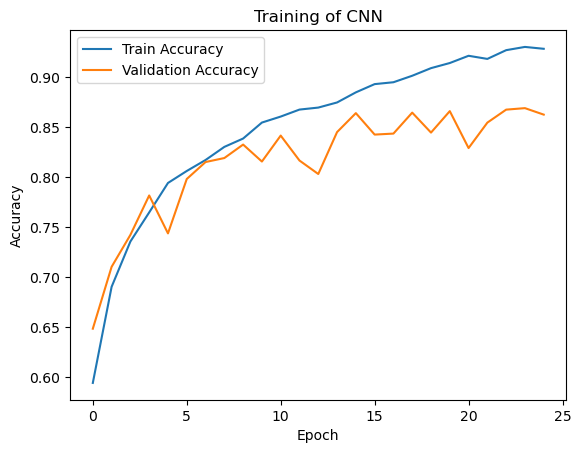

In [27]:
# learning process
plt.plot(history.history["accuracy"], label="Train Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Training of CNN")
plt.show()

In [28]:
loss, accuracy = cnn.evaluate(test_set)
print(f"Test Accuracy: {accuracy:.4f}")

63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 61ms/step - accuracy: 0.8598 - loss: 0.4482
Test Accuracy: 0.8626


## Prediction


1.


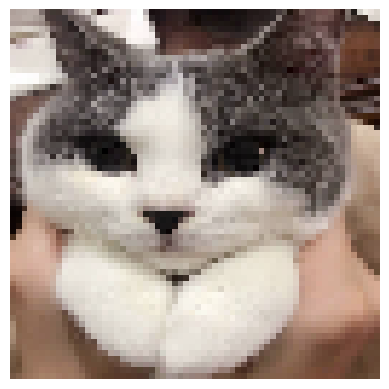

Prediction: cat

2.


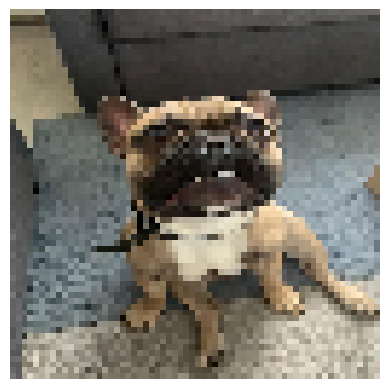

Prediction: dog

3.


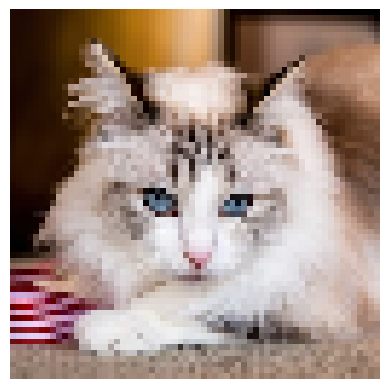

Prediction: cat

4.


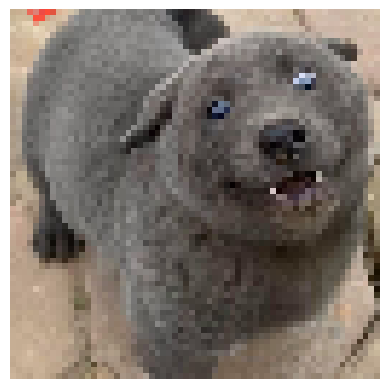

Prediction: dog

5.


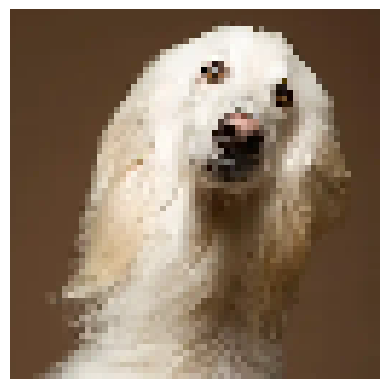

Prediction: dog


In [29]:
from tensorflow.keras.preprocessing import image

images = [
    image.load_img("./pic/pic_cat.png", target_size=(64, 64)),
    image.load_img("./pic/pic.png", target_size=(64, 64)),
    image.load_img("./pic/cat2.png", target_size=(64, 64)),
    image.load_img("./pic/dog2.png", target_size=(64, 64)),
    image.load_img("./pic/dog3.png", target_size=(64, 64))
]

for ind, img in zip(range(len(images)), images):
    print(f"\n{ind+1}.")
    plt.imshow(img)
    # prediction
    img_x = image.img_to_array(img)
    img_x = np.expand_dims(img_x, axis=0)
    result = cnn.predict(img_x, verbose=False)
    if result[0][0] == 1:
        prediction = "dog"
    else:
        prediction = "cat"
        
    plt.axis("off")
    plt.show()
    
    print(f"Prediction: {prediction}")